In [1]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import os
from Utils import *
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as dat


from sklearn.metrics import f1_score,confusion_matrix, accuracy_score

import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.4) # for label size

from Behavior_Drift import *

In [2]:
results = pd.read_csv('../output/drift_toy_results_w30_l10.csv')

results['loss'] = results.AE_model_error.apply(lambda x : x.strip("()").split(',')[0])
results['mae'] = results.AE_model_error.apply(lambda x : x.strip("()").split(',')[1])

results = results[['id', 'nb_drifts', 'nb_behaviors_detected', 'silhouette', 'loss', 'mae']]

#results = results[results.nb_drifts != 0]

results['right'] = results.nb_drifts + 1 == results.nb_behaviors_detected

results['min_right'] = results.nb_drifts < results.nb_behaviors_detected

results['loss'] = pd.to_numeric(results.loss, errors='coerce')

# results.loc[results.nb_drifts == 0, 'min_right'] = False

print(len(results[results.right==True])/len(results))

results[(results.right==False)].sort_values(['silhouette'], ascending=False)

0.83


,id,nb_drifts,nb_behaviors_detected,silhouette,loss,mae,right,min_right
86,44,4,4,0.736434,0.000760,0.00075976073,False,False
73,89,3,2,0.735013,0.000375,0.00037540367,False,False
50,27,3,2,0.721256,0.000613,0.0006129301,False,False
51,32,3,2,0.691230,0.000395,0.00039520423,False,False
63,62,3,2,0.672841,0.000524,0.0005241042,False,False
47,13,3,3,0.663412,0.000442,0.00044176163,False,False
68,73,3,3,0.662435,0.000351,0.0003506168,False,False
55,4,3,2,0.660389,0.000362,0.00036232328,False,False
58,49,3,3,0.659007,0.000363,0.00036298222,False,False
57,46,3,3,0.658453,0.000486,0.00048556618,False,False


C:\Users\cyriac.azefack\AppData\Roaming\Python\Python37\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


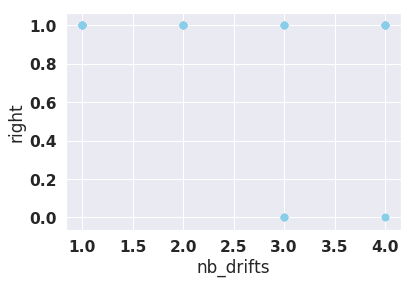

In [3]:
sns.regplot(data=results, x="nb_drifts", y="right", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':40})

<function print>

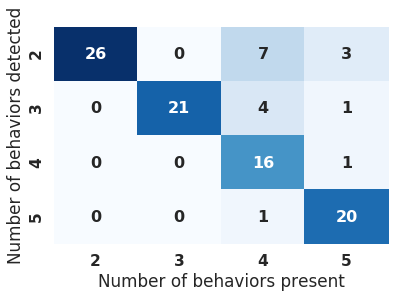

In [4]:
drift_range = [1, 2, 3, 4]
drift_range.sort()
conf_matrix = np.zeros((len(drift_range), len(drift_range)))

for i in drift_range:
    for j in drift_range:
        conf_matrix[j-1][i-1] = len(results[(results.nb_drifts == i) & (results.nb_behaviors_detected == j+1)])

df_cm = pd.DataFrame(conf_matrix, index=np.array(drift_range)+1, columns=np.array(drift_range)+1)


sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cbar=False, cmap='Blues') # font size
plt.ylabel("Number of behaviors detected")
plt.xlabel("Number of behaviors present")

print

In [5]:
right_results = results[results.nb_drifts == 0]
wrong_results = results[results.nb_drifts != 0]

(-0.25, 1)

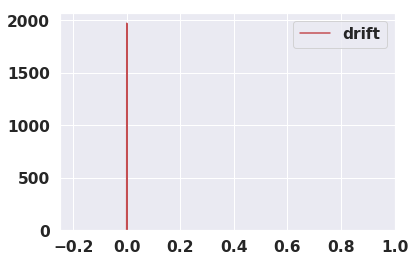

In [6]:
# Silhouette

sns.kdeplot(right_results.loss, shade=True, color="g", label='no drift')
sns.kdeplot(wrong_results.loss, shade=True, color="r", label='drift')
plt.xlim([-0.25, 1])

In [7]:
y_true = results.nb_drifts.values + 1
y_pred = results.nb_behaviors_detected.values


f1_score(y_true, y_pred, average='weighted')

0.8222265060560545

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 5 4 2 2 4 4 4 2 2 3 3 4 4 4 2 2 4 4 4 4 3 4 4 4 4 2
 4 2 5 5 5 5 5 5 5 5 5 2 4 5 5 3 5 5 5 5 5 2 5 5 5 5]


(0.5, 1.05)

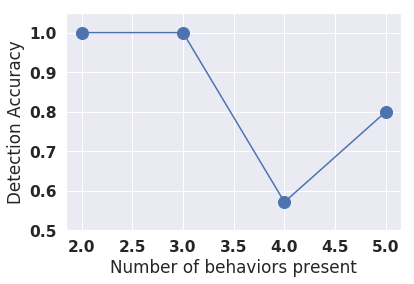

In [8]:
scores = []
print(y_true)
print(y_pred)
for n in drift_range :
    
    n_results = results[results.nb_drifts == n]
    
    n_y_true = n_results.nb_drifts.values + 1
    n_y_pred = n_results.nb_behaviors_detected.values
    
    score = accuracy_score(n_y_true, n_y_pred)
    scores.append(score)

plt.figure()
plt.plot(np.asarray(drift_range)+1, scores, marker='o', markersize=12)
plt.xlabel('Number of behaviors present')
plt.ylabel('Detection Accuracy')
plt.ylim([0.5, 1.05])

In [9]:
np.mean(scores)

0.8428571428571427

Text(0, 0.5, 'Silhouette score')

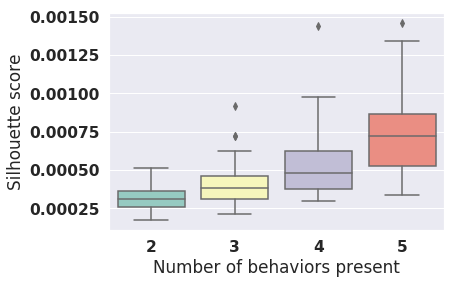

In [10]:
results.nb_drifts += 1
sns.boxplot(x="nb_drifts", y="loss", data=results, palette="Set3")
plt.xlabel('Number of behaviors present')
plt.ylabel('Silhouette score')